# This is our analysis workflow for the precisionFDA covid-19 challenge

In [1]:
# load library
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




We will do analysis per-patient and then per-disease stage and then per-study

In [115]:
list.files()

[1] "gitdir"               "installpackages.r"    "metadata.csv"        
 [4] "Pipfile"              "Pipfile.lock"         "precisionFDA_Covid19"
 [7] "renv"                 "renv.lock"            "seq_eda-Copy1.ipynb" 
[10] "seq_table_head_M.csv" "seqtable_200000.csv"

In [233]:
getwd()

[1] "/home/teamcovid/Documents/Projects/PrecisionFDA"

In [2]:
meta_data <- fread("metadata.csv") # read metadata
seqtable <- fread("seq_table_head_M.csv") # read sequence table
seq

In [52]:
write.csv(seqtable[1:10000], "seqtable_10000.csv")

Let's find the common fields (columns) in the sequence and meta-data tables.

In [69]:
# common columns
common_col <- intersect(names(meta_data), names(seqtable)) 

Here are the column names for the sequence table

In [70]:
names(seqtable)

[1] "sequence_id"              "sequence"                
  [3] "sequence_aa"              "rev_comp"                
  [5] "productive"               "vj_in_frame"             
  [7] "stop_codon"               "complete_vdj"            
  [9] "locus"                    "v_call"                  
 [11] "d_call"                   "d2_call"                 
 [13] "j_call"                   "c_call"                  
 [15] "sequence_alignment"       "sequence_alignment_aa"   
 [17] "germline_alignment"       "germline_alignment_aa"   
 [19] "junction"                 "junction_aa"             
 [21] "np1"                      "np1_aa"                  
 [23] "np2"                      "np2_aa"                  
 [25] "np3"                      "np3_aa"                  
 [27] "cdr1"                     "cdr1_aa"                 
 [29] "cdr2"                     "cdr2_aa"                 
 [31] "cdr3"                     "cdr3_aa"                 
 [33] "fwr1"                     "fwr1_aa"                 
 [35] "fwr2"                     "fwr2_aa"                 
 [37] "fwr3"                     "fwr3_aa"                 
 [39] "fwr4"                     "fwr4_aa"                 
 [41] "v_score"                  "v_identity"              
 [43] "v_support"                "v_cigar"                 
 [45] "d_score"                  "d_identity"              
 [47] "d_support"                "d_cigar"                 
 [49] "d2_score"                 "d2_identity"             
 [51] "d2_support"               "d2_cigar"                
 [53] "j_score"                  "j_identity"              
 [55] "j_support"                "j_cigar"                 
 [57] "c_score"                  "c_identity"              
 [59] "c_support"                "c_cigar"                 
 [61] "v_sequence_start"         "v_sequence_end"          
 [63] "v_germline_start"         "v_germline_end"          
 [65] "v_alignment_start"        "v_alignment_end"         
 [67] "d_sequence_start"         "d_sequence_end"          
 [69] "d_germline_start"         "d_germline_end"          
 [71] "d_alignment_start"        "d_alignment_end"         
 [73] "d2_sequence_start"        "d2_sequence_end"         
 [75] "d2_germline_start"        "d2_germline_end"         
 [77] "d2_alignment_start"       "d2_alignment_end"        
 [79] "j_sequence_start"         "j_sequence_end"          
 [81] "j_germline_start"         "j_germline_end"          
 [83] "j_alignment_start"        "j_alignment_end"         
 [85] "cdr1_start"               "cdr1_end"                
 [87] "cdr2_start"               "cdr2_end"                
 [89] "cdr3_start"               "cdr3_end"                
 [91] "fwr1_start"               "fwr1_end"                
 [93] "fwr2_start"               "fwr2_end"                
 [95] "fwr3_start"               "fwr3_end"                
 [97] "fwr4_start"               "fwr4_end"                
 [99] "v_sequence_alignment"     "v_sequence_alignment_aa" 
[101] "d_sequence_alignment"     "d_sequence_alignment_aa" 
[103] "d2_sequence_alignment"    "d2_sequence_alignment_aa"
[105] "j_sequence_alignment"     "j_sequence_alignment_aa" 
[107] "c_sequence_alignment"     "c_sequence_alignment_aa" 
[109] "v_germline_alignment"     "v_germline_alignment_aa" 
[111] "d_germline_alignment"     "d_germline_alignment_aa" 
[113] "d2_germline_alignment"    "d2_germline_alignment_aa"
[115] "j_germline_alignment"     "j_germline_alignment_aa" 
[117] "c_germline_alignment"     "c_germline_alignment_aa" 
[119] "junction_length"          "junction_aa_length"      
[121] "np1_length"               "np2_length"              
[123] "np3_length"               "n1_length"               
[125] "n2_length"                "n3_length"               
[127] "p3v_length"               "p5d_length"              
[129] "p3d_length"               "p5d2_length"             
[131] "p3d2_length"              "p5j_length"              
[133] "consensus_count"          "duplicat

Isolate from the seqtable relevant columns: sample-related fields also present in meta data table & amino acid sequence

Take a look at the columns

In [71]:
# common columns
common_col = intersect(names(meta_data), names(seqtable)) 
common_col

[1] "repertoire_id"        "sample_processing_id" "data_processing_id"  
[4] "germline_database"

nothing in common because the seqtable is incomplete

In [66]:
names(seqtable)

[1] "sequence_id"              "sequence"                
  [3] "sequence_aa"              "rev_comp"                
  [5] "productive"               "vj_in_frame"             
  [7] "stop_codon"               "complete_vdj"            
  [9] "locus"                    "v_call"                  
 [11] "d_call"                   "d2_call"                 
 [13] "j_call"                   "c_call"                  
 [15] "sequence_alignment"       "sequence_alignment_aa"   
 [17] "germline_alignment"       "germline_alignment_aa"   
 [19] "junction"                 "junction_aa"             
 [21] "np1"                      "np1_aa"                  
 [23] "np2"                      "np2_aa"                  
 [25] "np3"                      "np3_aa"                  
 [27] "cdr1"                     "cdr1_aa"                 
 [29] "cdr2"                     "cdr2_aa"                 
 [31] "cdr3"                     "cdr3_aa"                 
 [33] "fwr1"                     "fwr1_aa"                 
 [35] "fwr2"                     "fwr2_aa"                 
 [37] "fwr3"                     "fwr3_aa"                 
 [39] "fwr4"                     "fwr4_aa"                 
 [41] "v_score"                  "v_identity"              
 [43] "v_support"                "v_cigar"                 
 [45] "d_score"                  "d_identity"              
 [47] "d_support"                "d_cigar"                 
 [49] "d2_score"                 "d2_identity"             
 [51] "d2_support"               "d2_cigar"                
 [53] "j_score"                  "j_identity"              
 [55] "j_support"                "j_cigar"                 
 [57] "c_score"                  "c_identity"              
 [59] "c_support"                "c_cigar"                 
 [61] "v_sequence_start"         "v_sequence_end"          
 [63] "v_germline_start"         "v_germline_end"          
 [65] "v_alignment_start"        "v_alignment_end"         
 [67] "d_sequence_start"         "d_sequence_end"          
 [69] "d_germline_start"         "d_germline_end"          
 [71] "d_alignment_start"        "d_alignment_end"         
 [73] "d2_sequence_start"        "d2_sequence_end"         
 [75] "d2_germline_start"        "d2_germline_end"         
 [77] "d2_alignment_start"       "d2_alignment_end"        
 [79] "j_sequence_start"         "j_sequence_end"          
 [81] "j_germline_start"         "j_germline_end"          
 [83] "j_alignment_start"        "j_alignment_end"         
 [85] "cdr1_start"               "cdr1_end"                
 [87] "cdr2_start"               "cdr2_end"                
 [89] "cdr3_start"               "cdr3_end"                
 [91] "fwr1_start"               "fwr1_end"                
 [93] "fwr2_start"               "fwr2_end"                
 [95] "fwr3_start"               "fwr3_end"                
 [97] "fwr4_start"               "fwr4_end"                
 [99] "v_sequence_alignment"     "v_sequence_alignment_aa" 
[101] "d_sequence_alignment"     "d_sequence_alignment_aa" 
[103] "d2_sequence_alignment"    "d2_sequence_alignment_aa"
[105] "j_sequence_alignment"     "j_sequence_alignment_aa" 
[107] "c_sequence_alignment"     "c_sequence_alignment_aa" 
[109] "v_germline_alignment"     "v_germline_alignment_aa" 
[111] "d_germline_alignment"     "d_germline_alignment_aa" 
[113] "d2_germline_alignment"    "d2_germline_alignment_aa"
[115] "j_germline_alignment"     "j_germline_alignment_aa" 
[117] "c_germline_alignment"     "c_germline_alignment_aa" 
[119] "junction_length"          "junction_aa_length"      
[121] "np1_length"               "np2_length"              
[123] "np3_length"               "n1_length"               
[125] "n2_length"                "n3_length"               
[127] "p3v_length"               "p5d_length"              
[129] "p3d_length"               "p5d2_length"             
[131] "p3d2_length"              "p5j_length"              
[133] "consensus_count"          "duplicat

In [4]:
#isolate sequence column
#seqtable[, common_col]
length(unique(seqtable$sequence_id))
nrow(seqtable$data_processing_id)

[1] 1000000

NULL

In [5]:
seq_dt <- seqtable[,c("sequence_id", "junction_aa", "sample_processing_id")]

In [45]:
names(meta_data)

[1] "repository"                         "study_title"                       
  [3] "disease_diagnosis"                  "study_group_description"           
  [5] "sequences"                          "lab_name"                          
  [7] "tissue"                             "pcr_target_locus"                  
  [9] "cell_subset"                        "cell_phenotype"                    
 [11] "pub_ids"                            "study_id"                          
 [13] "subject_id"                         "sample_id"                         
 [15] "template_class"                     "sequencing_platform"               
 [17] "repertoire_id"                      "repertoire_name"                   
 [19] "repertoire_description"             "study_type"                        
 [21] "study_type_id"                      "study_description"                 
 [23] "inclusion_exclusion_criteria"       "grants"                            
 [25] "collected_by"                       "lab_address"                       
 [27] "submitted_by"                       "keywords_study"                    
 [29] "synthetic"                          "species"                           
 [31] "species_id"                         "organism"                          
 [33] "organism_id"                        "sex"                               
 [35] "age"                                "age_min"                           
 [37] "age_max"                            "age_unit"                          
 [39] "age_unit_id"                        "age_event"                         
 [41] "ancestry_population"                "ethnicity"                         
 [43] "race"                               "strain_name"                       
 [45] "linked_subjects"                    "link_type"                         
 [47] "disease_diagnosis_id"               "disease_length"                    
 [49] "disease_stage"                      "prior_therapies"                   
 [51] "immunogen"                          "intervention"                      
 [53] "medical_history"                    "sample_processing_id"              
 [55] "sample_type"                        "tissue_id"                         
 [57] "anatomic_site"                      "disease_state_sample"              
 [59] "collection_time_point_relative"     "collection_time_point_reference"   
 [61] "biomaterial_provider"               "tissue_processing"                 
 [63] "cell_subset_id"                     "cell_species"                      
 [65] "cell_species_id"                    "single_cell"                       
 [67] "cell_number"                        "cells_per_reaction"                
 [69] "cell_storage"                       "cell_quality"                      
 [71] "cell_isolation"                     "cell_processing_protocol"          
 [73] "template_quality"                   "template_amount"                   
 [75] "library_generation_method"          "library_generation_protocol"       
 [77] "library_generation_kit_version"     "forward_pcr_primer_target_location"
 [79] "reverse_pcr_primer_target_location" "complete_sequences"                
 [81] "physical_linkage"                   "sequencing_run_id"                 
 [83] "total_reads_passing_qc_filter"      "sequencing_facility"               
 [85] "sequencing_run_date"                "sequencing_kit"                    
 [87] "file_type"                          "filename"                          
 [89] "read_direction"                     "read_length"                       
 [91] "paired_filename"                    "paired_read_direction"             
 [93] "paired_read_length"                 "data_processing_id"                
 [95] "primary_annotation"                 "software_versions"                 
 [97] "paired_reads_assembly"              "quality_thresholds"                
 [99] "primer_match_cutoffs"               "collapsing_method"                 
[1

isolate relevant columns: sample_id, subject_id, age, ethnicity, strain_name, disease_stage

In [6]:
meta_data_dt <- meta_data[, c("sample_id", "subject_id","sample_processing_id", "sex", "intervention", "disease_stage", "disease_diagnosis") ]

Join sequence and metadata tables with selected columns

In [7]:
seq_meta_dt <- merge( x = seq_dt, y = meta_data_dt, by = "sample_processing_id", all.x = T)

In [8]:
seq_meta_dt[1,]

sample_processing_id,sequence_id,junction_aa,sample_id,subject_id,sex,intervention,disease_stage,disease_diagnosis
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e87,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19


In [9]:
seq_meta_dt_1 <- seq_meta_dt[subject_id == "ADIRP0000014"] 

Let's get some statistics about the sequences and the disease stages of patient ADIRP0000014

In [96]:
seq_meta_dt_1

sample_processing_id,sequence_id,junction_aa,sample_id,subject_id,sex,intervention,disease_stage,disease_diagnosis
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e87,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e88,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e89,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8a,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8b,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8c,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8d,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8e,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19
5f4c16a983a8226b3dd8db57,5f4c1a0b3378361a5abf9e8f,CASSLLYVLGTEAFF,ADIR0000014_TCRB,ADIRP0000014,male,,Recovered,COVID-19


In [10]:
# remove blank sequences
seq_meta_dt_1_clean <- seq_meta_dt_1[junction_aa!=""]

In [11]:
names(seq_meta_dt_1_clean)

[1] "sample_processing_id" "sequence_id"          "junction_aa"         
[4] "sample_id"            "subject_id"           "sex"                 
[7] "intervention"         "disease_stage"        "disease_diagnosis"

In [12]:
setDF(seq_meta_dt_1_clean)
seq_meta_dt_1_clean_clean <- seq_meta_dt_1_clean[!grepl(pattern = "\\*",seq_meta_dt_1_clean$junction_aa),]
setDT(seq_meta_dt_1_clean_clean)

In [13]:
nrow(seq_meta_dt_1_clean_clean)

[1] 499820

In [14]:
seq_meta_dt_1_clean_14 <- seq_meta_dt_1_clean_clean$junction_aa[nchar(seq_meta_dt_1_clean_clean$junction_aa) == "14"]


In [213]:
length(seq_meta_dt_1_clean_14[is.na(seq_meta_dt_1_clean_14)])

[1] 0

Let's take a look at the sequence motifs. First, we will segment by length then we will perform sequence alignment

In [15]:
library(ggmsa)
library(universalmotif)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [222]:
nrow(seq_meta_dt_1_clean_14)

NULL

In [16]:
motif_14 <- create_motif(seq_meta_dt_1_clean_14, alphabet = "AA")

In [218]:
## check 
class(motif_14)

[1] "universalmotif"
attr(,"package")
[1] "universalmotif"

In [17]:
pcm = convert_type(motif_14, "PCM")

In [144]:
class(pcm)

[1] "universalmotif"
attr(,"package")
[1] "universalmotif"

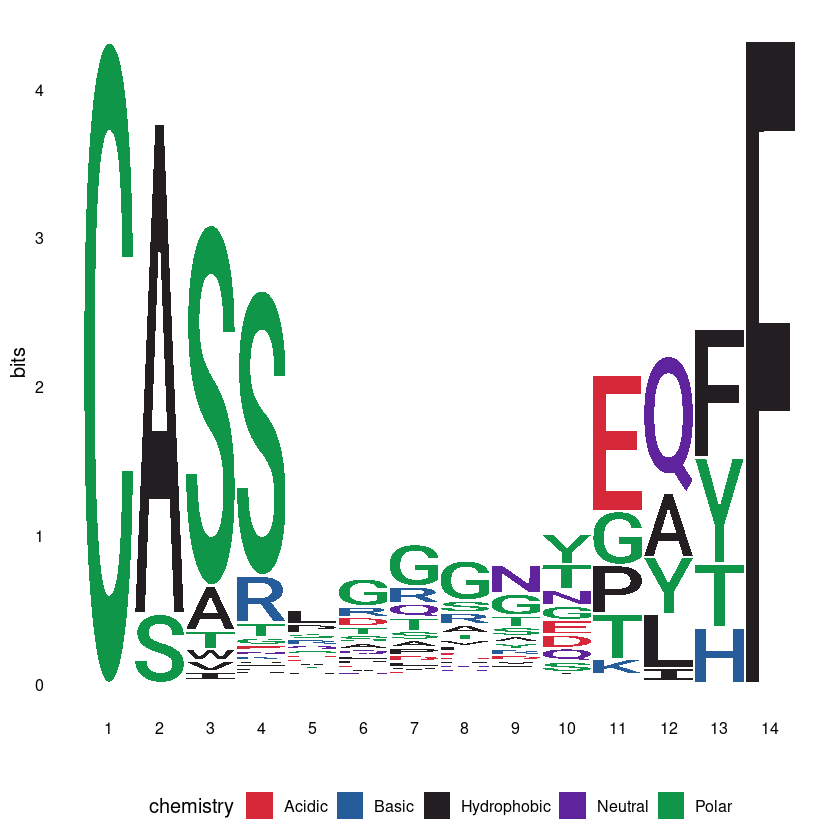

In [18]:
view_motifs(pcm)

In [221]:
pcm


       Motif name:   motif
         Alphabet:   AA
             Type:   PCM
         Total IC:   29.58
        Consensus:   CASSLGGGNYEQFF
     Target sites:   106649

       C     A     S     S     L     G     G     G     N     Y     E     Q
A      0 93303 10397  1036  3858  6465  5817  7886  5924  2302   299 20974
C 106548     0   113    97    26     9     6     8    17     8     1     6
D      0     0    11   409  6169  9734  4952  3683  4831  9723   100    14
E      1     1     9  1454  5588  4187  2584  4282  1867 10235 47082    45
F      0     3    30   153  3993   945   839  1531  1274   390    23     3
G      4     8   270  2040  6291 28330 32500 34544 19555 10295 18666    53
H      0     0    15   239  1289  1052   992   686  1288  1115    15    48
I      0     3  1899   977  2575  1204  1132  1798  1510   253   667  4282
K      0     3     9  1291  1993  1002   621  1379  1152   411  5380    51
L      2     1    80   942 21009  4641  4073  4739  2619   656   110 17596
M     

In [19]:
# perform sequence alignment with msa
library(msa)

Loading required package: Biostrings

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, whi

In [21]:
library(seqinr)


Attaching package: ‘seqinr’


The following object is masked from ‘package:Biostrings’:

    translate


The following object is masked from ‘package:dplyr’:

    count




In [ ]:
# remove duplicates
seq_meta_dt_1_clean_clean_unique <- seq_meta_dt_1_clean_clean[order(-junction_aa)][!duplicated(junction_aa)]

In [45]:
# save first 100 lines to fasta file called file.out
write.fasta(strsplit(seq_meta_dt_1_clean_clean_unique$junction_aa[1:1000],''), seq_meta_dt_1_clean_clean_unique$sequence_id[1:1000], './file.out', open = "w", nbchar = 20,  as.string = F)

In [289]:
strsplit(seq_meta_dt_1_clean_clean_unique$junction_aa[1:25],'')

[[1]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[2]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[3]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[4]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[5]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[6]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[7]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[8]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[9]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

[[10]]
 [1] "C" "A" "S" "S" "L" "L" "Y" "V" "L" "G" "T" "E" "A" "F" "F"

In [47]:
# read the fasta file
mySequenceFile <- system.file("examples", "exampleAA.fasta", package="msa") # package example
mySequences <- readAAStringSet(mySequenceFile)
junction_seq <- readAAStringSet('./file.out')


In [48]:
junction_seq

  A AAStringSet instance of length 1000
       width seq                                            names               
   [1]     7 YYDEQFF                                        5f4c1d393378361a5...
   [2]     6 YVEAFF                                         5f4c1ce03378361a5...
   [3]    16 YSWTSGETSTLNTQYF                               5f4c1bbf3378361a5...
   [4]    16 YSVEDLASRMGETQYF                               5f4c1bbf3378361a5...
   [5]    17 YSSSWSILQSRANVLTF                              5f4c1bbf3378361a5...
   ...   ... ...
 [996]    12 CSVWGSGTEAFF                                   5f4c1bbf3378361a5...
 [997]    12 CSVWGQGYGYTF                                   5f4c1cdf3378361a5...
 [998]    14 CSVWGLDWGTEAFF                                 5f4c1bbf3378361a5...
 [999]    12 CSVWGGTDTQYF                                   5f4c1bbe3378361a5...
[1000]    15 CSVWGGGPSSYEQYF                                5f4c1ce03378361a5...

In [49]:
junction_seq_msa = msa(junction_seq)

use default substitution matrix


In [50]:
junction_seq_msa

CLUSTAL 2.1  

Call:
   msa(junction_seq)

MsaAAMultipleAlignment with 1000 rows and 55 columns
       aln                                                 names
   [1] -----------CSVWTL-------...--------G-WYGYT-------F- 5f4c1b303378361a5...
   [2] -----------CSVWT--------...--------G-NYGYT-------F- 5f4c1ce03378361a5...
   [3] -----------CSVYTG-------...--------GPNYGYT-------F- 5f4c1b303378361a5...
   [4] -----------CSVYKQ-------...--------G-AYGYT-------F- 5f4c1b303378361a5...
   [5] -----------CSVYDVSR-----...--------GSGYGYT-------F- 5f4c1c4a3378361a5...
   [6] -----------CSVYDLT------...--------G-GVSYT-------F- 5f4c1b303378361a5...
   [7] ------------SVF---------...------------------------ 5f4c1aa53378361a5...
   [8] -----------CSVWTGG------...--------D---GYT-------F- 5f4c1c4a3378361a5...
   [9] -----------CSVWTGG------...--------D---GYT-------F- 5f4c1b303378361a5... 
   ... ...
 [993] ----------RASS----CLYVGT...-----------ELFF--------- 5f4c1ce03378361a5...
 [994] ----------RASS----SQ

In [51]:
motif_x <- create_motif(junction_seq_msa, alphabet = "AA")

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘create_motif’ for signature ‘"MsaAAMultipleAlignment"’
